In [115]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
#import time as TIME
import datetime
%matplotlib inline

In [2]:
url='http://opendap.renci.org:1935/thredds/dodsC/Test/fort.61.nc'
var_name='zeta'
nc=netCDF4.Dataset(url)
print nc.variables.keys()

[u'time', u'station_name', u'x', u'y', u'zeta']


In [5]:
time=nc.variables['time']
var=nc.variables[var_name]
dtime = netCDF4.num2date(time[:],time.units)
tstart=dtime[0].strftime('%Y-%b-%d')
tstr=nc.comments
#print tstr
sn=nc.variables['station_name']
lstr=[]
for i in range(sn.shape[0]) :
    temp=sn[i,:].tostring()
    temp=temp.strip('\x00')  # gets rid of some garbage in the strings
    lstr.append(temp)

for p in lstr: print p

8651370 Duck Pier                                 
8652587 Oregon Inlet Marina                       
8654467 USCG Hatteras                             
8656483 Beaufort                                  
8658163 Atlantic Coast at J. Mercer Pier at Wright
8659897 Sunset Beach                              


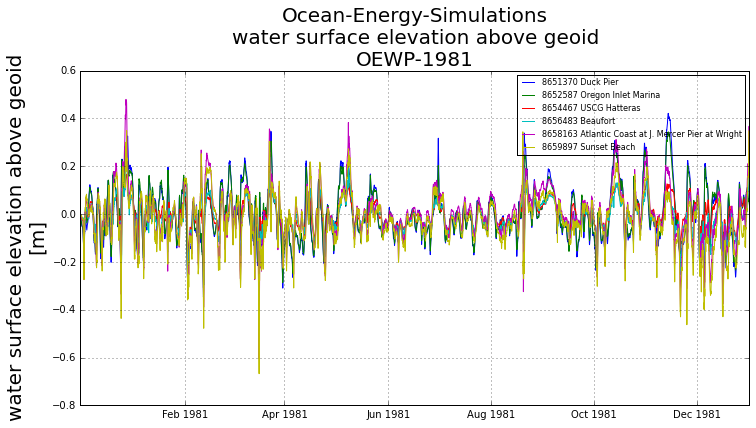

In [87]:
fig = plt.figure(figsize=(12,6), dpi=144)
pc=plt.plot(dtime,var)
plt.title("%s\n%s\n%s" % (nc.title, var.long_name, tstr), fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel("%s\n[%s]" % (var.long_name, var.units), fontsize=20)
plt.legend(lstr, fontsize=8)

## Let's build an OPeNDAP url to retrieve NOAA gauge data directly into python

In [90]:
STATION_ID="8651370"
DATUM="MSL"
BEGIN_DATE="19810101"
END_DATE="19820101"
url=['http://opendap.co-ops.nos.noaa.gov/dods/IOOS/Hourly_Height_Verified_Water_Level?',
     'WATERLEVEL_HOURLY_VFD_PX.DATE_TIME,',
     'WATERLEVEL_HOURLY_VFD_PX.WL_VALUE&',
     'WATERLEVEL_HOURLY_VFD_PX._STATION_ID="%s"&',
     'WATERLEVEL_HOURLY_VFD_PX._DATUM="%s"&',
     'WATERLEVEL_HOURLY_VFD_PX._BEGIN_DATE="%s"&',
     'WATERLEVEL_HOURLY_VFD_PX._END_DATE="%s"'
     ]
url[3] = url[3] % STATION_ID
url[4] = url[4] % DATUM
url[5] = url[5] % BEGIN_DATE
url[6] = url[6] % END_DATE

FullUrl="".join(url)
nc2=netCDF4.Dataset(FullUrl)
print nc2


<type 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    Owner: Web site owner: Center for Operational Oceanographic Products and Services (CO-OPS)
    Privacy_Policy: For the Privacy Policy please visit http://tidesandcurrents.noaa.gov/privacy.html
    title: CO-OPS Hourly verified Water Level Data
    host: http://opendap.co-ops.nos.noaa.gov/dods/
    contact: IOOS.Webmaster@noaa.gov
    REQUIRED_Fields:  _STATION_ID, _DATUM, _BEGIN_DATE and _END_DATE 
    dimensions(sizes): WATERLEVEL_HOURLY_VFD_PX(8789), maxStrlen64(64)
    variables(dimensions): |S1 WATERLEVEL_HOURLY_VFD_PX.DATE_TIME(WATERLEVEL_HOURLY_VFD_PX,maxStrlen64), float64 WATERLEVEL_HOURLY_VFD_PX.WL_VALUE(WATERLEVEL_HOURLY_VFD_PX)
    groups: 



In [93]:
print nc2.variables.keys()
wl=nc2.variables['WATERLEVEL_HOURLY_VFD_PX.WL_VALUE']
time=nc2.variables['WATERLEVEL_HOURLY_VFD_PX.DATE_TIME']

[u'WATERLEVEL_HOURLY_VFD_PX.DATE_TIME', u'WATERLEVEL_HOURLY_VFD_PX.WL_VALUE']


In [119]:
# the time data returned above is in an almost usless format.  
# temp="".join(time[0,:])
# temp=TIME.strptime(temp,"%b %d %Y %I:%M%p")
# print TIME.strftime("%Y", temp)

# let's build a time vector, assuming hourly data
#print datetime.date(BEGIN_DATE)